## Data types

Discrete Data:
    - integer based, often counts of some event.
    - How many purchases did a customer make in a yera?
    - How many times did I flif heads?
 Continous Data
     - Has an infinite number of possible values
     - How much time did it take for a user to check out?
     -  How much rain fell on a givern day?

Categorical Data:
    Qualitative data
    - Gender, Yes/ no, race, etc.

Ordinal:
    A miture of numerical and categorical
    - Categorical data that has mathematical meaning: 1 means worse movie than a 2
    
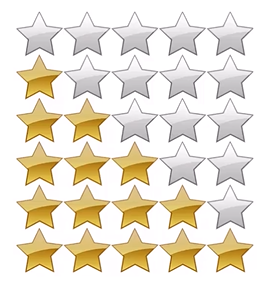

Mode: the most common number in a data set

### Variance:
Measeures how "pread-out" the data is.
Variance is the average of the squared differences from the mean
EXAMPLE:
Variance of set (1, 4, 5, 4, 8)
    - First find the mean (1+4+5+4+8)/5 = 4.4
    = Now find the differences from the mean: (1 - 4.4, 4- 4.4, 5 - 4.4, etc)
    - (-3.4, -0.4, 0.6, -0.4, 3.6)
    - find the squared differences: (11.56, 0.16, 0.36, 0.16, 12.96)
    - find the average of the squared differences:
    a~2 = (11.56 + 0.16 + 0.36 + 0.16 + 12.96) / 5 = 5.04

### Standard deviation:
Square room of the variance

Is usually used as a way to identify outliers (wartości odstajace). Data points that lie more than one standard deviation from the mean can be considered unusual.

You can talk about how extreme a data point is by talking about "how many sigmas" away from the mean iti is.
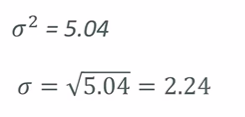

So, the standard variation of (1, 4, 5, 4, 8) is 2.24.

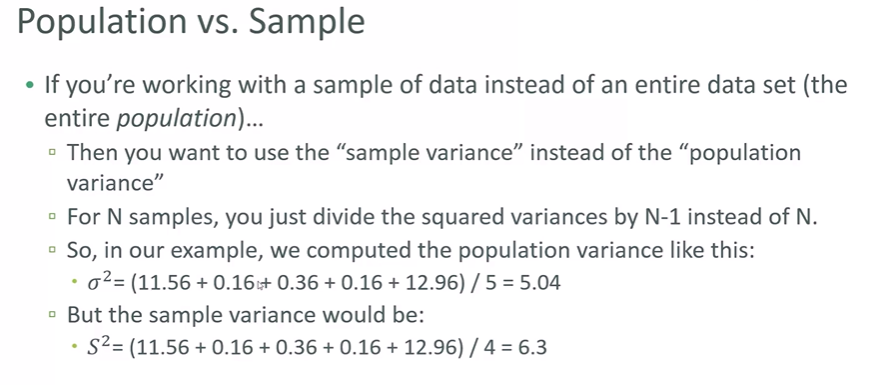

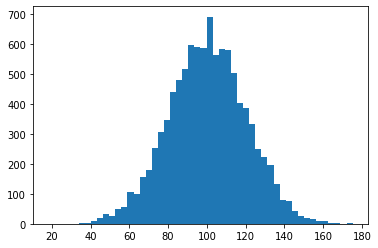

In [2]:
import numpy as np
import matplotlib.pyplot as plt

income = np.random.normal(100, 20.0, 10000)

plt.hist(income, 50)
plt.show()

In [3]:
income.std()

20.052036933618258

In [4]:
income.var()

402.0841851871907

### Normal distribution:
Gives you the probability of a data point falling within some given range of a given value

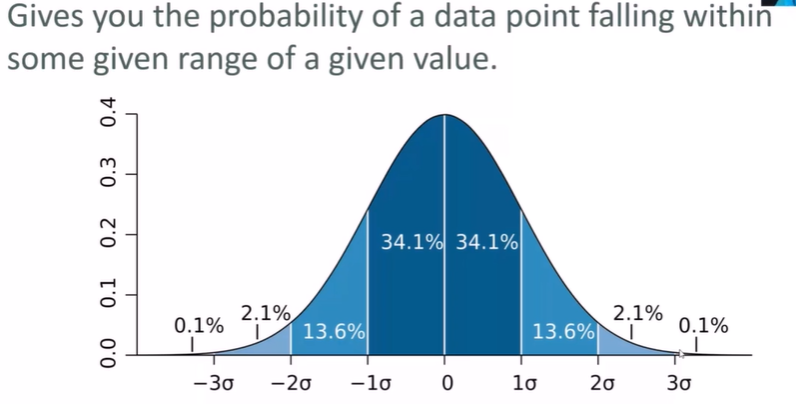

### Probability Mass Function:
The way we viualise the probbility of discreet data occurring

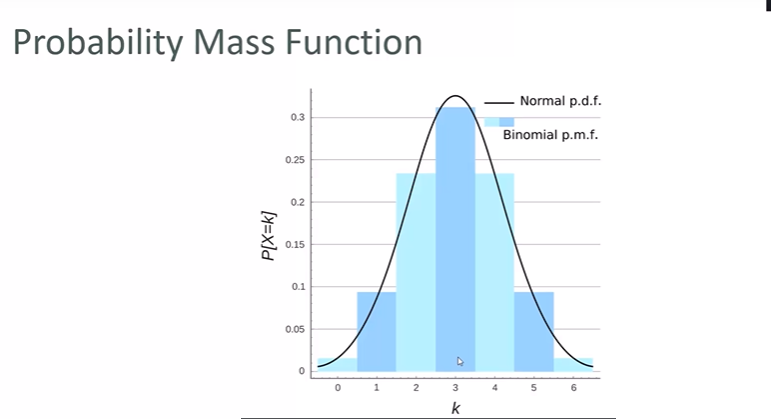

## Examples of Data Distributions


### Uniform Distribution

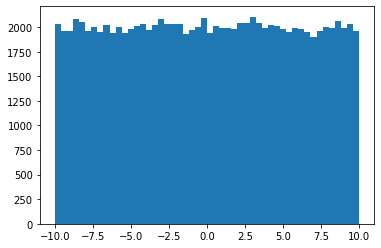

In [5]:
values = np.random.uniform(-10., 10., 100000)
plt.hist(values, 50)
plt.show()

### Normal / Gaussian

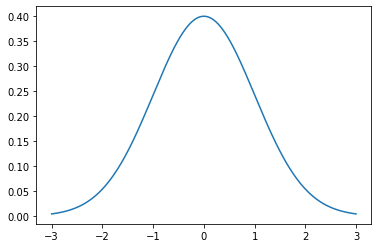

In [7]:
from scipy.stats import norm

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x)) # pdf probability density function
plt.show()

Generate some random numbers with a normal distribution. "mu" is the desired mean, "sigma" is the standard deviation.

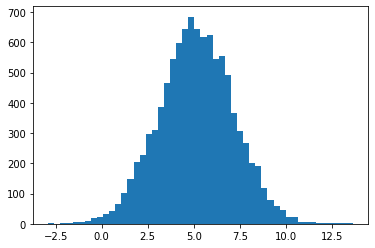

In [12]:
mu = 5.1
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

### Exponential PDF / "Power Law"

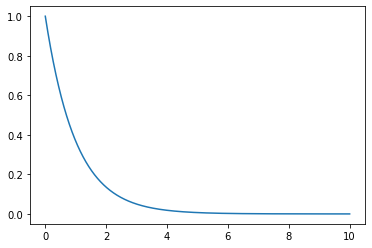

In [13]:
from scipy.stats import expon

x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x))
plt.show()

## Binomial Probability Mass Function

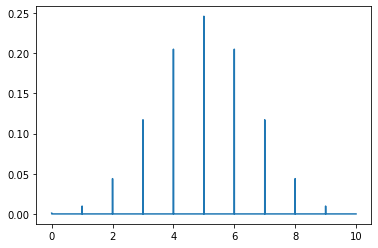

In [14]:
from scipy.stats import binom

n, p = 10, 0.5
x = np.arange(0, 10, 0.001)
plt.plot(x, binom.pmf(x, n, p))
plt.show()

## Poisson Probability Mass Funtion

My website gets on average 500 visits per day, what's the odds of getting 550?

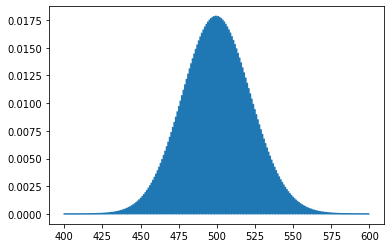

In [15]:
from scipy.stats import poisson

mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))
plt.show()